## SALES PERFORMANCE ANALYSIS PROJECT 
### By FELIX IDOWU

## Objective
## -- Analyze Sales Data to identify Sales trend over time
## --Evaluate Shipping Efficiency
## --Identify Best-Selling Products & Categories
## --Assess Customer Segments & Regions
## --Measure Profitability & Discounts Impact

## Importing libraries needed 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Click [Here](https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset/data) to get dataset used

In [3]:
#Importing dataset 
df=pd.read_csv("Project data - Project data.csv")
df.head(4)

,order_id,order_date,ship_date,Time to ship,ship_mode,customer_name,segment,state,country,market,...,quantity,discount,net_sales,discounted price,profit,loss,shipping_cost,order_priority,year,profit.1
0,AG-2011-2040,1/1/2011,6/1/2011,5,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,...,2,0.0,408,0,106.140,0.000,35.46,Medium,2011,106.140
1,IN-2011-47883,1/1/2011,8/1/2011,7,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,...,3,0.1,108,12,36.036,0.000,9.72,Medium,2011,36.036
2,HU-2011-1220,1/1/2011,5/1/2011,4,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,...,4,0.0,66,0,29.640,0.000,8.17,High,2011,29.640
3,IT-2011-3647632,1/1/2011,5/1/2011,4,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,...,3,0.5,22.5,22.5,0.000,26.055,4.82,High,2011,-26.055


In [4]:
#Column Overview
df.columns

Index(['order_id', 'order_date', 'ship_date', 'Time to ship', 'ship_mode',
       'customer_name', 'segment', 'state', 'country', 'market', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'net_sales', 'discounted price', 'profit',
       'loss', 'shipping_cost', 'order_priority', 'year', 'profit.1'],
      dtype='object')

In [5]:
df.dtypes

order_id             object
order_date           object
ship_date            object
Time to ship          int64
ship_mode            object
customer_name        object
segment              object
state                object
country              object
market               object
region               object
product_id           object
category             object
sub_category         object
product_name         object
sales                object
quantity              int64
discount            float64
net_sales            object
discounted price     object
profit              float64
loss                float64
shipping_cost       float64
order_priority       object
year                  int64
profit.1            float64
dtype: object

## Data Cleaning

In [6]:
df.isna().sum()

order_id            0
order_date          0
ship_date           0
Time to ship        0
ship_mode           0
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity            0
discount            0
net_sales           0
discounted price    0
profit              0
loss                0
shipping_cost       0
order_priority      0
year                0
profit.1            0
dtype: int64

In [7]:
#Checking for duplicates
df.duplicated().sum()

0

## Dataset Exploration

In [8]:
df.shape

(51290, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51290 non-null  object 
 1   order_date        51290 non-null  object 
 2   ship_date         51290 non-null  object 
 3   Time to ship      51290 non-null  int64  
 4   ship_mode         51290 non-null  object 
 5   customer_name     51290 non-null  object 
 6   segment           51290 non-null  object 
 7   state             51290 non-null  object 
 8   country           51290 non-null  object 
 9   market            51290 non-null  object 
 10  region            51290 non-null  object 
 11  product_id        51290 non-null  object 
 12  category          51290 non-null  object 
 13  sub_category      51290 non-null  object 
 14  product_name      51290 non-null  object 
 15  sales             51290 non-null  object 
 16  quantity          51290 non-null  int64 

In [10]:
#Statistical Overview
df.describe()

,Time to ship,quantity,discount,profit,loss,shipping_cost,year,profit.1
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.969370,3.476545,0.145278,46.585927,17.944188,26.375915,2012.777208,28.641740
std,1.729437,2.278766,0.214113,138.842309,97.337858,57.296804,1.098931,174.424113
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,-6599.978000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,2.610000,2012.000000,0.000000
50%,4.000000,3.000000,0.000000,9.240000,0.000000,7.790000,2013.000000,9.240000
75%,5.000000,5.000000,0.200000,36.810000,0.000000,24.450000,2014.000000,36.810000
max,7.000000,14.000000,0.900000,8399.976000,6599.978000,933.570000,2014.000000,8399.976000


## Validating Datatypes

In [11]:
df.dtypes

order_id             object
order_date           object
ship_date            object
Time to ship          int64
ship_mode            object
customer_name        object
segment              object
state                object
country              object
market               object
region               object
product_id           object
category             object
sub_category         object
product_name         object
sales                object
quantity              int64
discount            float64
net_sales            object
discounted price     object
profit              float64
loss                float64
shipping_cost       float64
order_priority       object
year                  int64
profit.1            float64
dtype: object

In [12]:
df[['order_date','ship_date']]

,order_date,ship_date
0,1/1/2011,6/1/2011
1,1/1/2011,8/1/2011
2,1/1/2011,5/1/2011
3,1/1/2011,5/1/2011
4,1/1/2011,8/1/2011
...,...,...
51285,31-12-2014,4/1/2015
51286,31-12-2014,5/1/2015
51287,31-12-2014,2/1/2015
51288,31-12-2014,6/1/2015


In [17]:
#correcting the date datatype
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True, errors='coerce')


In [18]:
df.head()

,order_id,order_date,ship_date,Time to ship,ship_mode,customer_name,segment,state,country,market,...,quantity,discount,net_sales,discounted price,profit,loss,shipping_cost,order_priority,year,profit.1
0,AG-2011-2040,2011-01-01,2011-01-06,5,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,...,2,0.0,408,0,106.140,0.000,35.46,Medium,2011,106.140
1,IN-2011-47883,2011-01-01,2011-01-08,7,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,...,3,0.1,108,12,36.036,0.000,9.72,Medium,2011,36.036
2,HU-2011-1220,2011-01-01,2011-01-05,4,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,...,4,0.0,66,0,29.640,0.000,8.17,High,2011,29.640
3,IT-2011-3647632,2011-01-01,2011-01-05,4,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,...,3,0.5,22.5,22.5,0.000,26.055,4.82,High,2011,-26.055
4,IN-2011-47883,2011-01-01,2011-01-08,7,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,...,5,0.1,102.6,11.4,37.770,0.000,4.70,Medium,2011,37.770


### Correcting the Sales column Datatype

In [20]:
## debugging an error i got in the sales column datatype
df[df.sales.apply(len)>=4]

,order_id,order_date,ship_date,Time to ship,ship_mode,customer_name,segment,state,country,market,...,quantity,discount,net_sales,discounted price,profit,loss,shipping_cost,order_priority,year,profit.1
27,MX-2011-111255,2011-01-04,2011-01-09,5,Second Class,Russell Applegate,Consumer,Parana,Brazil,LATAM,...,6,0.0,"1,648.00",0,609.8400,0.0000,109.13,Medium,2011,609.8400
43,MX-2011-109267,2011-01-05,2011-01-09,4,Standard Class,Jennifer Halladay,Consumer,Veracruz,Mexico,LATAM,...,8,0.0,"3,029.00",0,999.3600,0.0000,191.20,Medium,2011,999.3600
58,CA-2011-167199,2011-01-07,2011-01-11,4,Standard Class,Maria Etezadi,Home Office,Kentucky,United States,US,...,9,0.0,"2,574.00",0,746.4078,0.0000,258.99,High,2011,746.4078
83,AO-2011-1670,2011-01-08,2011-01-13,5,Standard Class,Henia Zydlo,Consumer,Benguela,Angola,Africa,...,6,0.0,"2,479.00",0,49.5000,0.0000,349.87,High,2011,49.5000
84,IN-2011-19330,2011-01-08,2011-01-12,4,Second Class,Nicole Fjeld,Home Office,Yunnan,China,APAC,...,7,0.0,"2,174.00",0,260.8200,0.0000,275.52,Medium,2011,260.8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51151,MX-2014-167682,2014-12-30,2015-01-03,4,Standard Class,Jill Fjeld,Consumer,Pará,Brazil,LATAM,...,7,0.0,"1,831.00",0,768.8800,0.0000,155.85,High,2014,768.8800
51152,US-2014-158526,2014-12-30,2015-01-02,3,Second Class,Katherine Hughes,Consumer,Kentucky,United States,US,...,8,0.0,"1,208.00",0,314.0384,0.0000,139.47,Medium,2014,314.0384
51228,MX-2014-116267,2014-12-31,2015-01-03,3,Second Class,Erica Bern,Corporate,São Paulo,Brazil,LATAM,...,5,0.0,"1,264.00",0,301.4660,0.0000,253.25,High,2014,301.4660
51229,IN-2014-43550,2014-12-31,2015-01-01,1,First Class,Marina Lichtenstein,Corporate,Jakarta,Indonesia,APAC,...,3,0.1,"1,014.60",76.4,46.9206,0.0000,243.11,High,2014,46.9206


In [19]:
df.dtypes

order_id                    object
order_date          datetime64[ns]
ship_date           datetime64[ns]
Time to ship                 int64
ship_mode                   object
customer_name               object
segment                     object
state                       object
country                     object
market                      object
region                      object
product_id                  object
category                    object
sub_category                object
product_name                object
sales                       object
quantity                     int64
discount                   float64
net_sales                   object
discounted price            object
profit                     float64
loss                       float64
shipping_cost              float64
order_priority              object
year                         int64
profit.1                   float64
dtype: object

In [21]:
df['sales']=df.sales.str.replace(',', '')

In [22]:
df.sales=df.sales.astype(int)

In [23]:
df.sales.dtypes

dtype('int32')

In [17]:
df['sales'].astype(int)

0        408
1        120
2         66
3         45
4        114
        ... 
51285     14
51286      4
51287     26
51288      7
51289      3
Name: sales, Length: 51290, dtype: int32

In [18]:
df.shape

(51290, 26)

## Analysis of Key Metrics

#### Profit,sales and loss per Segment

In [19]:
df.segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [20]:
pd.pivot_table(df, values='sales',index='segment',)

,sales
segment,
Consumer,245.423524
Corporate,247.897336
Home Office,247.239217


In [24]:
segment=df.groupby('segment')['sales','profit','loss'].sum().reset_index()
segment.loss=(segment.loss.round(0).astype(int))
segment['profit']=(segment['profit'].round(0).astype(int))
df.profit=df.profit.round(0).astype(int)

C:\Users\FELIX\AppData\Local\Temp\ipykernel_5184\991254415.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segment=df.groupby('segment')['sales','profit','loss'].sum().reset_index()


In [25]:
segment

,segment,sales,profit,loss
0,Consumer,6508141,1226597,477357
1,Corporate,3824808,717586,274800
2,Home Office,2309956,445209,168200


In [26]:
print('Total_sales:',segment.sales.sum())
print('Total_profit:',segment['profit'].sum())
print('Total_loss:',segment['loss'].sum())

Total_sales: 12642905
Total_profit: 2389392
Total_loss: 920357


In [27]:
pd.DataFrame(
    {'Total_sales': [12642905],
'Total_profit': [1469035],
'Total_loss': [920357]}
)

,Total_sales,Total_profit,Total_loss
0,12642905,1469035,920357


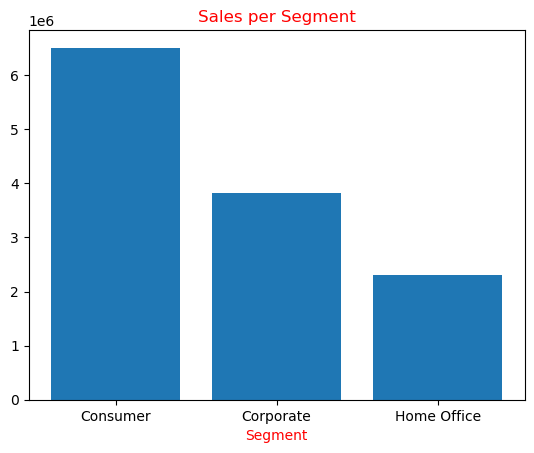

In [218]:
plt.bar(segment.segment,segment.sales)
# plt.plot(seg.segment,seg['profit'])
# plt.plot(seg.segment,seg.loss)

plt.title('Sales per Segment', color='r')
plt.xlabel('Segment', color='red')

plt.show()

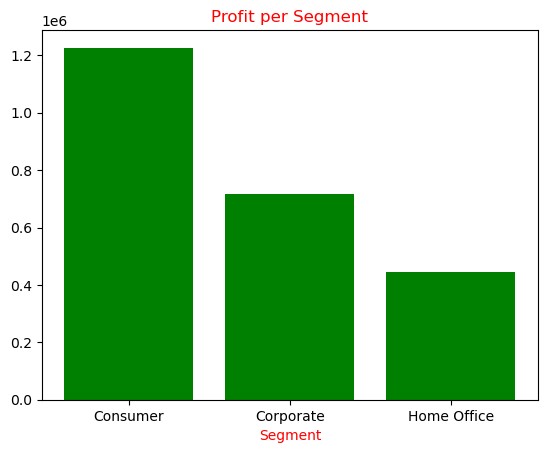

In [219]:
plt.bar(segment.segment,segment['profit'], color='green')
plt.title('Profit per Segment', color='r')
plt.xlabel('Segment', color='red')

plt.show()

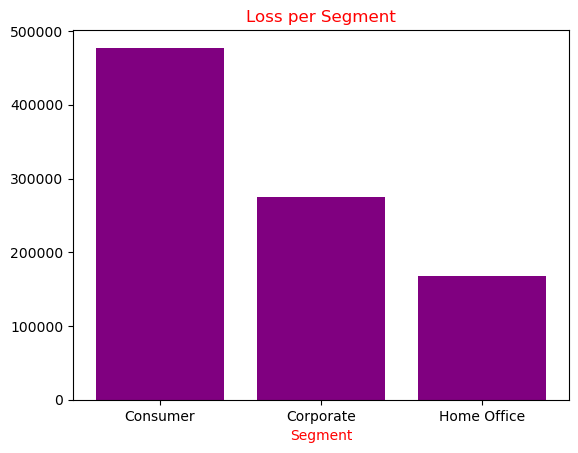

In [220]:
plt.bar(segment.segment,segment.loss, color='purple')
plt.title('Loss per Segment', color='r')
plt.xlabel('Segment', color='red')

plt.show()

##### We can conclude that: 
* Most sale comes from the consumer segment
* Profit and loss is proportional to the sales

#### Sales, profit and loss per region


In [29]:
df.region.unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [138]:
#grouping metrics and sorting them 
region=df.groupby('region')['sales','profit','loss'].sum().sort_values('sales',ascending=False).reset_index()
region

C:\Users\FELIX\AppData\Local\Temp\ipykernel_5184\464036135.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region=df.groupby('region')['sales','profit','loss'].sum().sort_values('sales',ascending=False).reset_index()


,region,sales,profit,loss
0,Central,2822399,513666,202196.36690
1,South,1600960,297570,157234.74518
2,North,1248192,246729,52134.83996
3,Oceania,1100207,177370,55684.41900
4,Southeast Asia,884438,107323,89471.72840
5,North Asia,848349,191103,25554.80100
6,EMEA,806184,166947,123065.91300
7,Africa,783776,177765,88875.03300
8,Central Asia,752839,162031,29568.05100
9,West,725514,131110,22720.96090


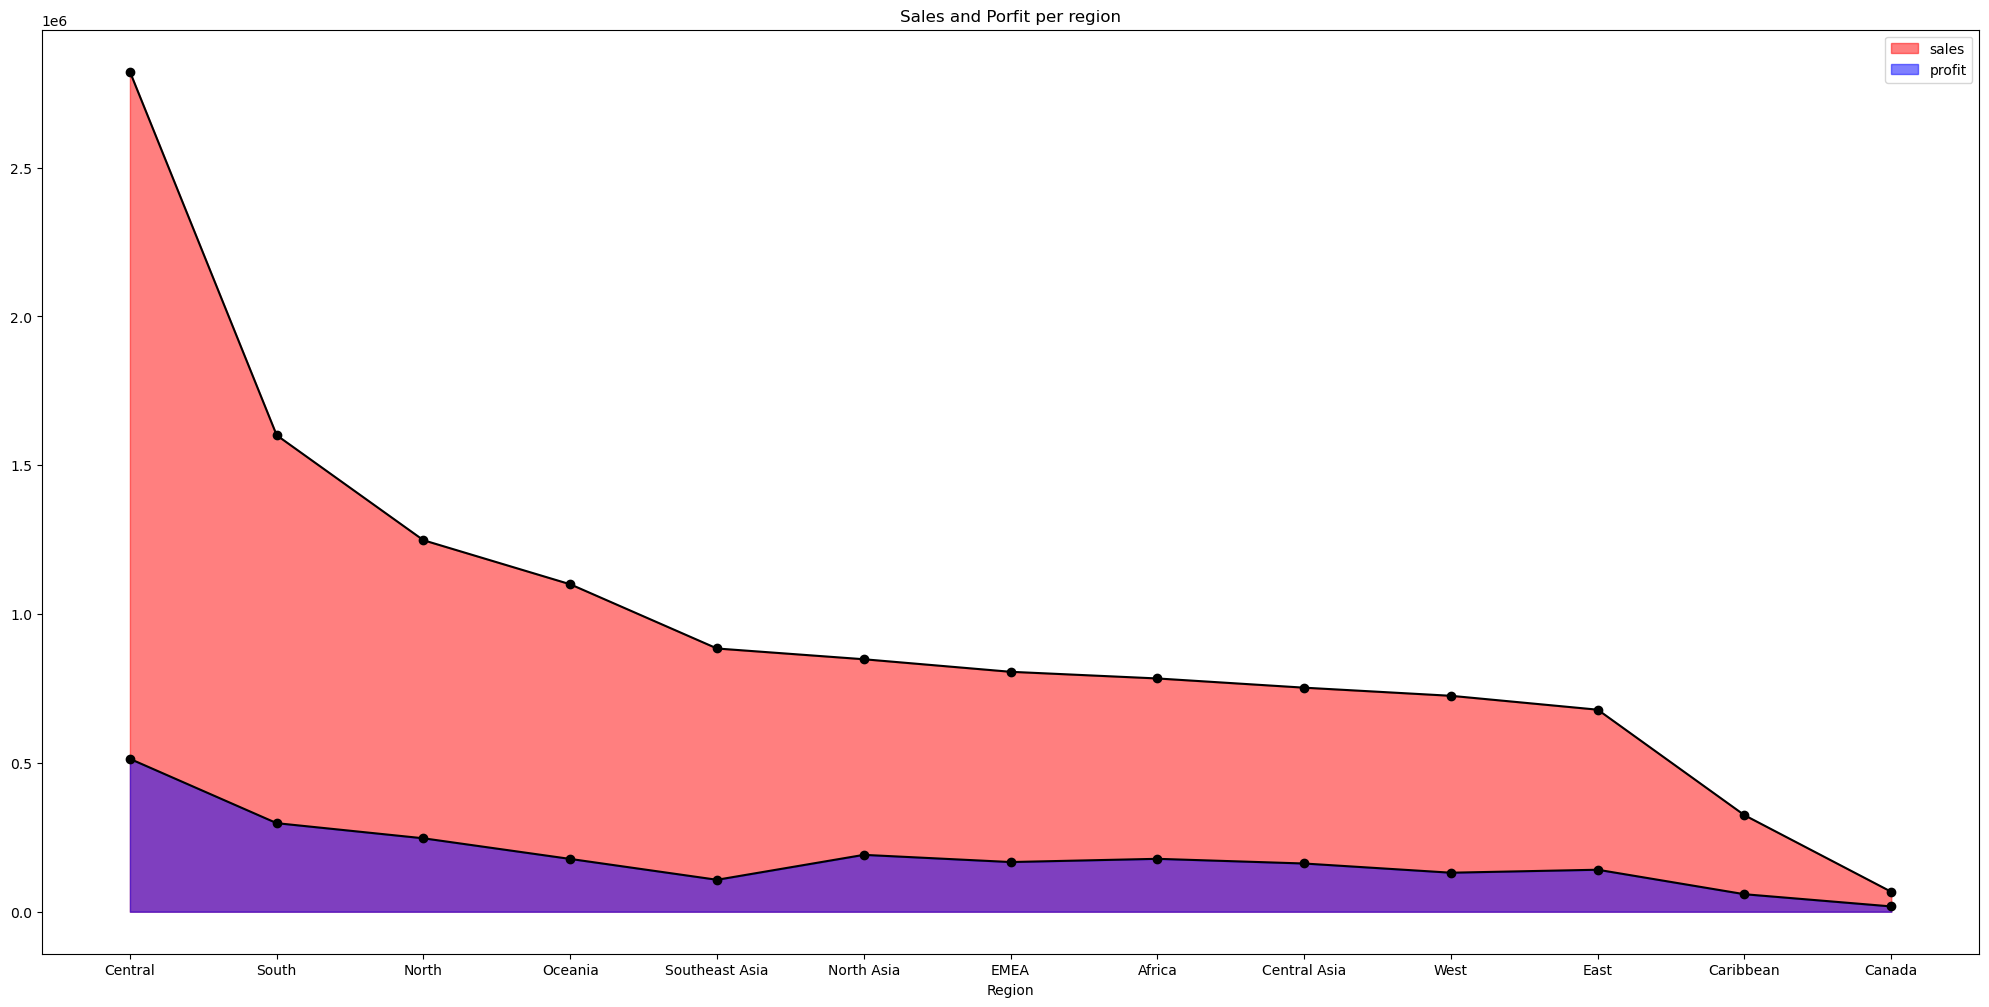

In [275]:
plt.figure(figsize=(25,12))
plt.plot(region.region,region.sales, marker='o', color='black')
plt.plot(region.region,region['profit'], marker='o',color='black')
plt.fill_between(region.region, region['sales'], alpha=0.5, color='r',label='sales')
plt.fill_between(region.region, region['profit'], alpha=0.5, color='b',label='profit')
plt.title('Sales and Porfit per region')
plt.xlabel('Region')

plt.legend()
plt.show()

In [32]:
df.dtypes

order_id             object
order_date           object
ship_date            object
Time to ship          int64
ship_mode            object
customer_name        object
segment              object
state                object
country              object
market               object
region               object
product_id           object
category             object
sub_category         object
product_name         object
sales                 int32
quantity              int64
discount            float64
net_sales            object
discounted price     object
profit                int32
loss                float64
shipping_cost       float64
order_priority       object
year                  int64
profit.1            float64
dtype: object

In [33]:
# df.to_csv('sales.csv')

In [34]:
# df.to_csv("sales_clean.csv", index=False)


In [35]:
# df.to_csv("salesclean.csv", index=False, quoting=1)  # Quote only necessary fields
# 

In [33]:
region=df.groupby('region')['profit'].sum().sort_values(ascending=False).reset_index()
region

,region,profit
0,Central,513666
1,South,297570
2,North,246729
3,North Asia,191103
4,Africa,177765
5,Oceania,177370
6,EMEA,166947
7,Central Asia,162031
8,East,141103
9,West,131110


## Sales Trend Per Year
### Sales, profit and loss per year

In [34]:
df.year.unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [35]:
year=df.groupby('year')['sales','profit','loss'].sum().reset_index()
year

C:\Users\FELIX\AppData\Local\Temp\ipykernel_5184\1346044956.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year=df.groupby('year')['sales','profit','loss'].sum().reset_index()


,year,sales,profit,loss
0,2011,2259511,418249,169308.15652
1,2012,2677493,502716,195342.34086
2,2013,3405860,654151,245618.42282
3,2014,4300041,814221,310088.47052


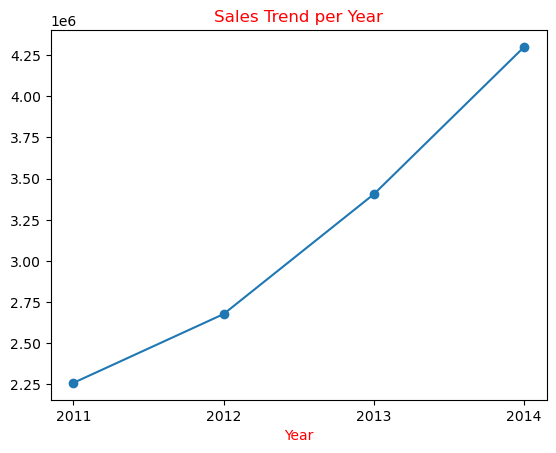

In [223]:
plt.plot(year['year'], year['sales'], marker='o')
plt.title('Sales Trend per Year', color='r')
#Force only  years as x-axis ticks
plt.xticks(year['year'], year['year'])  
plt.xlabel('Year', color='r')

plt.show()

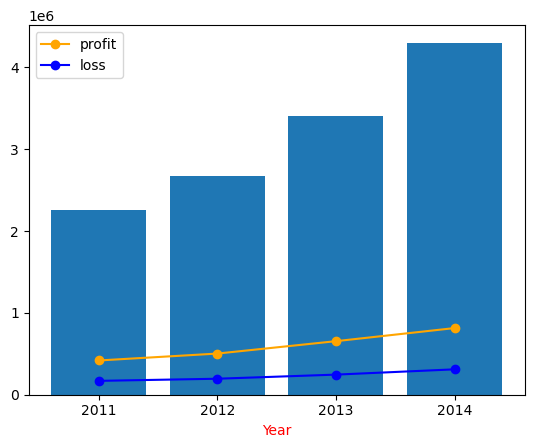

In [217]:
#Auxilliary Chart on prodit loss and sales per year
plt.plot(year['year'], year['profit'], marker='o',label='profit', color='orange')
plt.bar(year['year'], year['sales'],)# marker='o')
plt.plot(year['year'], year['loss'], marker='o',label='loss', color='blue')
plt.legend()

plt.xlabel('Year')
plt.xlabel('Year', color='red')

plt.xticks(year['year'], year['year'])  

plt.show()

## Sales per category

In [63]:
catgy=df.groupby(['category'])[['sales','profit','loss']].sum().reset_index().sort_values('sales')
catgy

,category,sales,profit,loss
1,Office Supplies,3787330,782429,263981.91760
0,Furniture,4110884,656679,369880.07470
2,Technology,4744691,950229,286495.39842


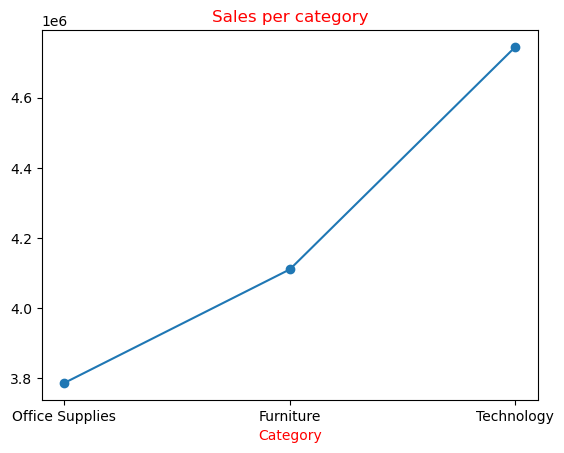

In [208]:
plt.plot(catgy.category, catgy.sales, marker='o')
plt.title('Sales per category', color='red')
plt.xlabel('Category', color='red')
plt.show()




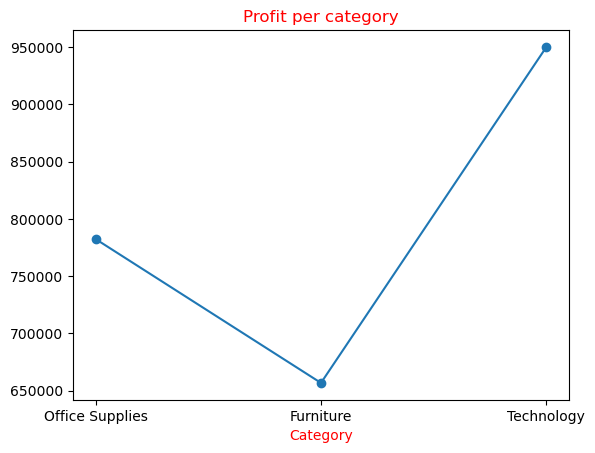

In [209]:
plt.plot(catgy.category, catgy.profit, marker='o')
plt.title('Profit per category', color='red')
plt.xlabel('Category', color='red')

plt.show()

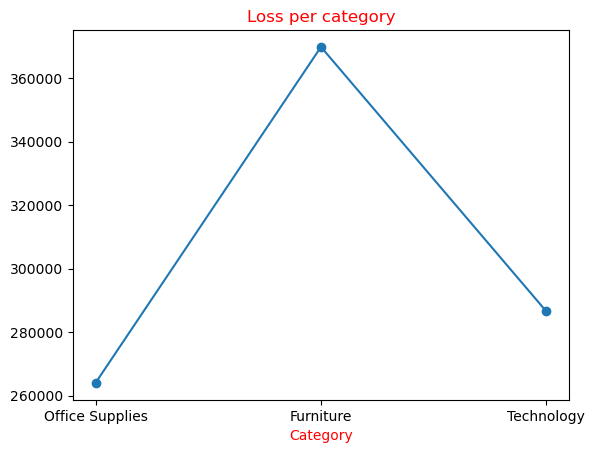

In [210]:
plt.plot(catgy.category, catgy.loss, marker='o')
plt.title('Loss per category',color='r')
plt.xlabel('Category', color='red')

plt.show()

## From Here we can see that 
* ### Furniture, despite being the second highest-selling category, incurs the greatest loss and the lowest profit.
* ### Office Supplies, with the lowest sales, generates the second highest profit while experiencing the least loss.
* ### Technology leads in both sales and profit.

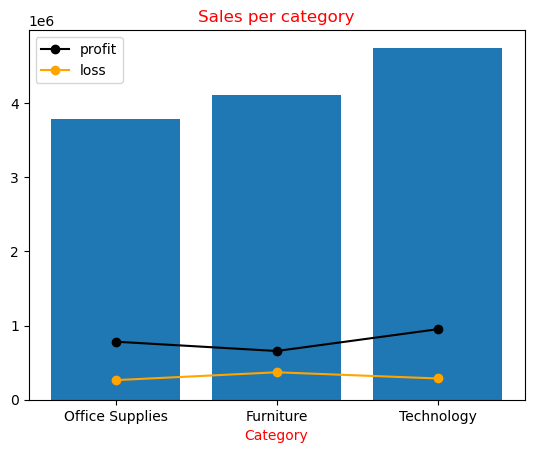

In [212]:
plt.plot(catgy.category, catgy.profit, marker='o' , label='profit', color='black')
plt.bar(catgy.category, catgy.sales)
plt.plot(catgy.category, catgy.loss, marker='o', label='loss', color='orange')
plt.title('Sales per category', color='r')
plt.xlabel('Category', color='red')

plt.legend()
plt.show()


## Sub_

In [178]:
s_catgy=df.groupby('sub_category')[['profit','sales','loss']].sum().reset_index().sort_values('sales', ascending=False)
s_catgy

,sub_category,profit,sales,loss
13,Phones,313109,1706874,96417.66010
6,Copiers,330119,1509439,71547.49982
5,Chairs,237782,1501682,95796.13190
4,Bookcases,263374,1466559,101446.29730
14,Storage,184560,1127124,76063.97800
1,Appliances,205657,1011081,63991.69040
11,Machines,137529,779071,78672.74030
16,Tables,80018,757034,144123.14860
0,Accessories,169472,749307,39857.49820
3,Binders,125296,461952,52884.06130


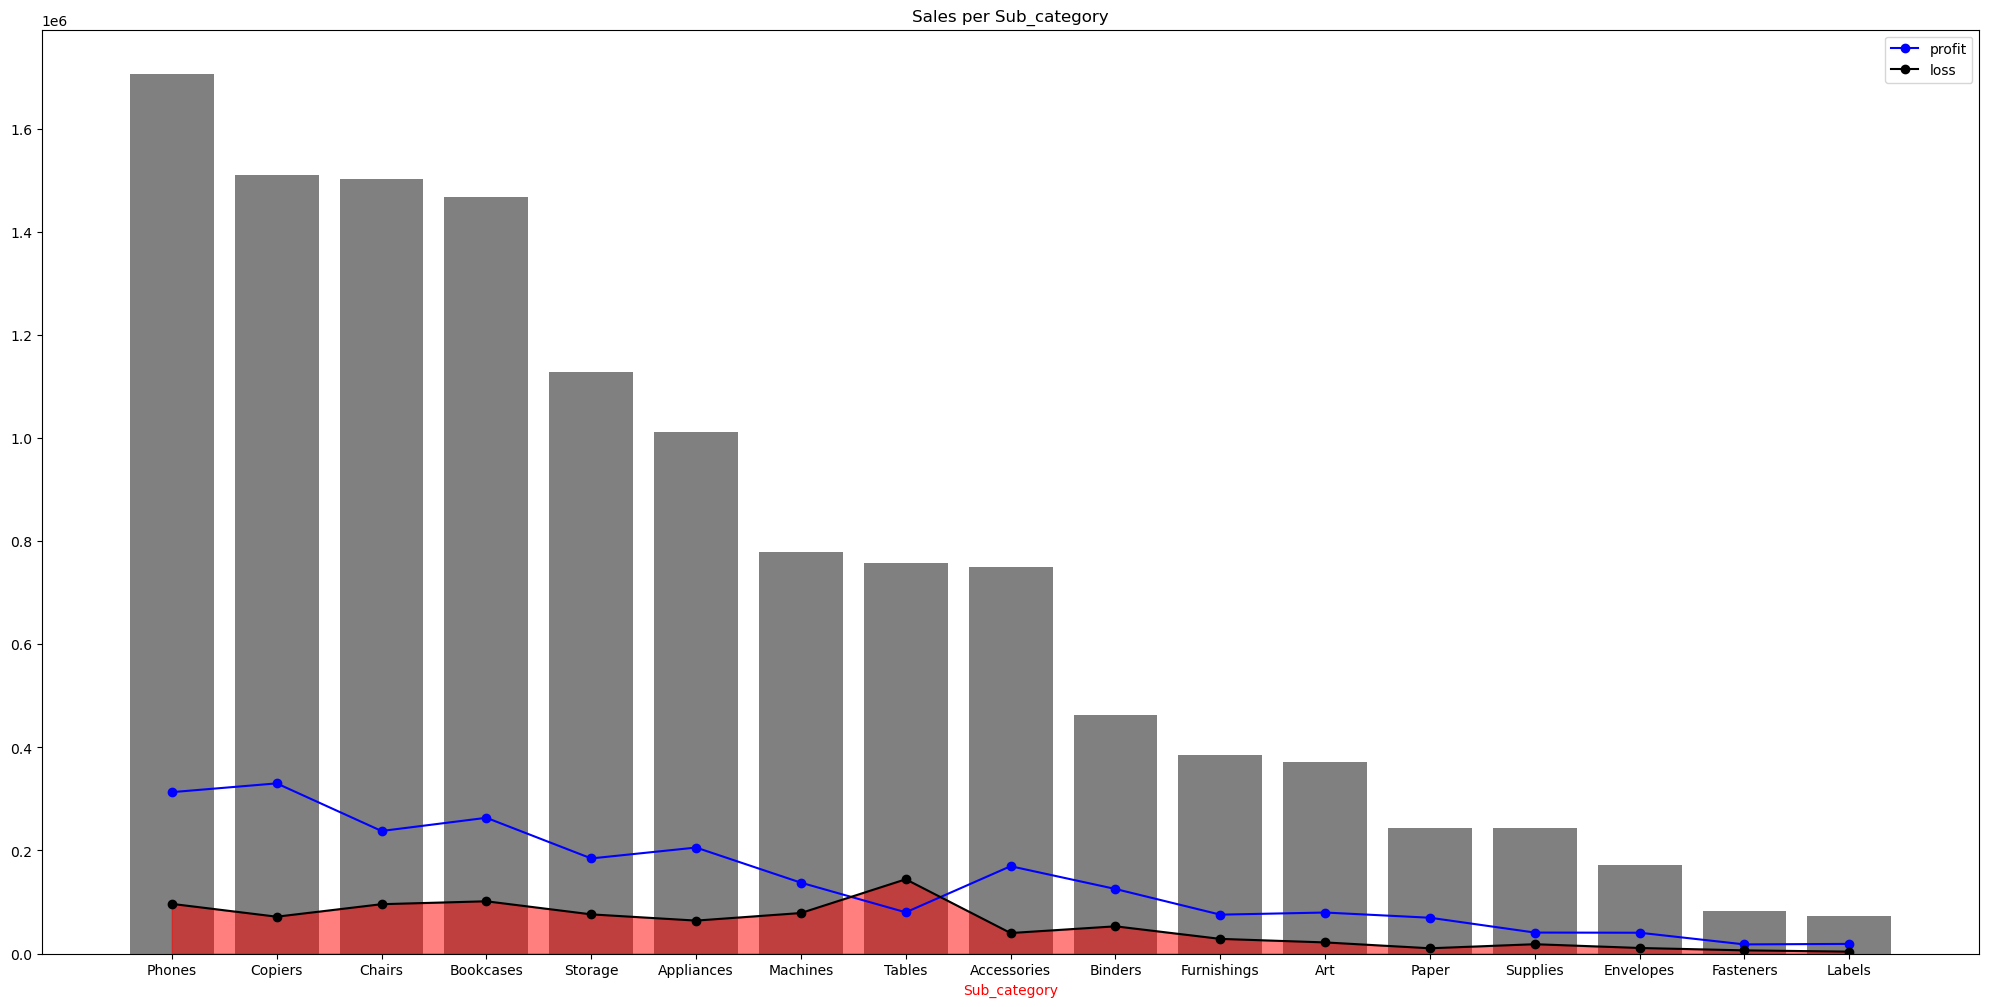

In [213]:
plt.figure(figsize=(25,12))

plt.bar(s_catgy.sub_category, s_catgy.sales, color='grey')
plt.plot(s_catgy.sub_category, s_catgy.profit, marker='o', color='b',label='profit')
plt.plot(s_catgy.sub_category, s_catgy.loss, marker='o', color='black',label='loss')
# plt.fill_between(s_catgy.sub_category,s_catgy.profit, alpha=0.5, color='b')
plt.legend()
plt.fill_between(s_catgy.sub_category,s_catgy.loss, alpha=0.5, color='r')
plt.xlabel('Sub_category', color='red')

plt.title('Sales per Sub_category')
plt.show()

Text(0.5, 0, 'Sub_category')

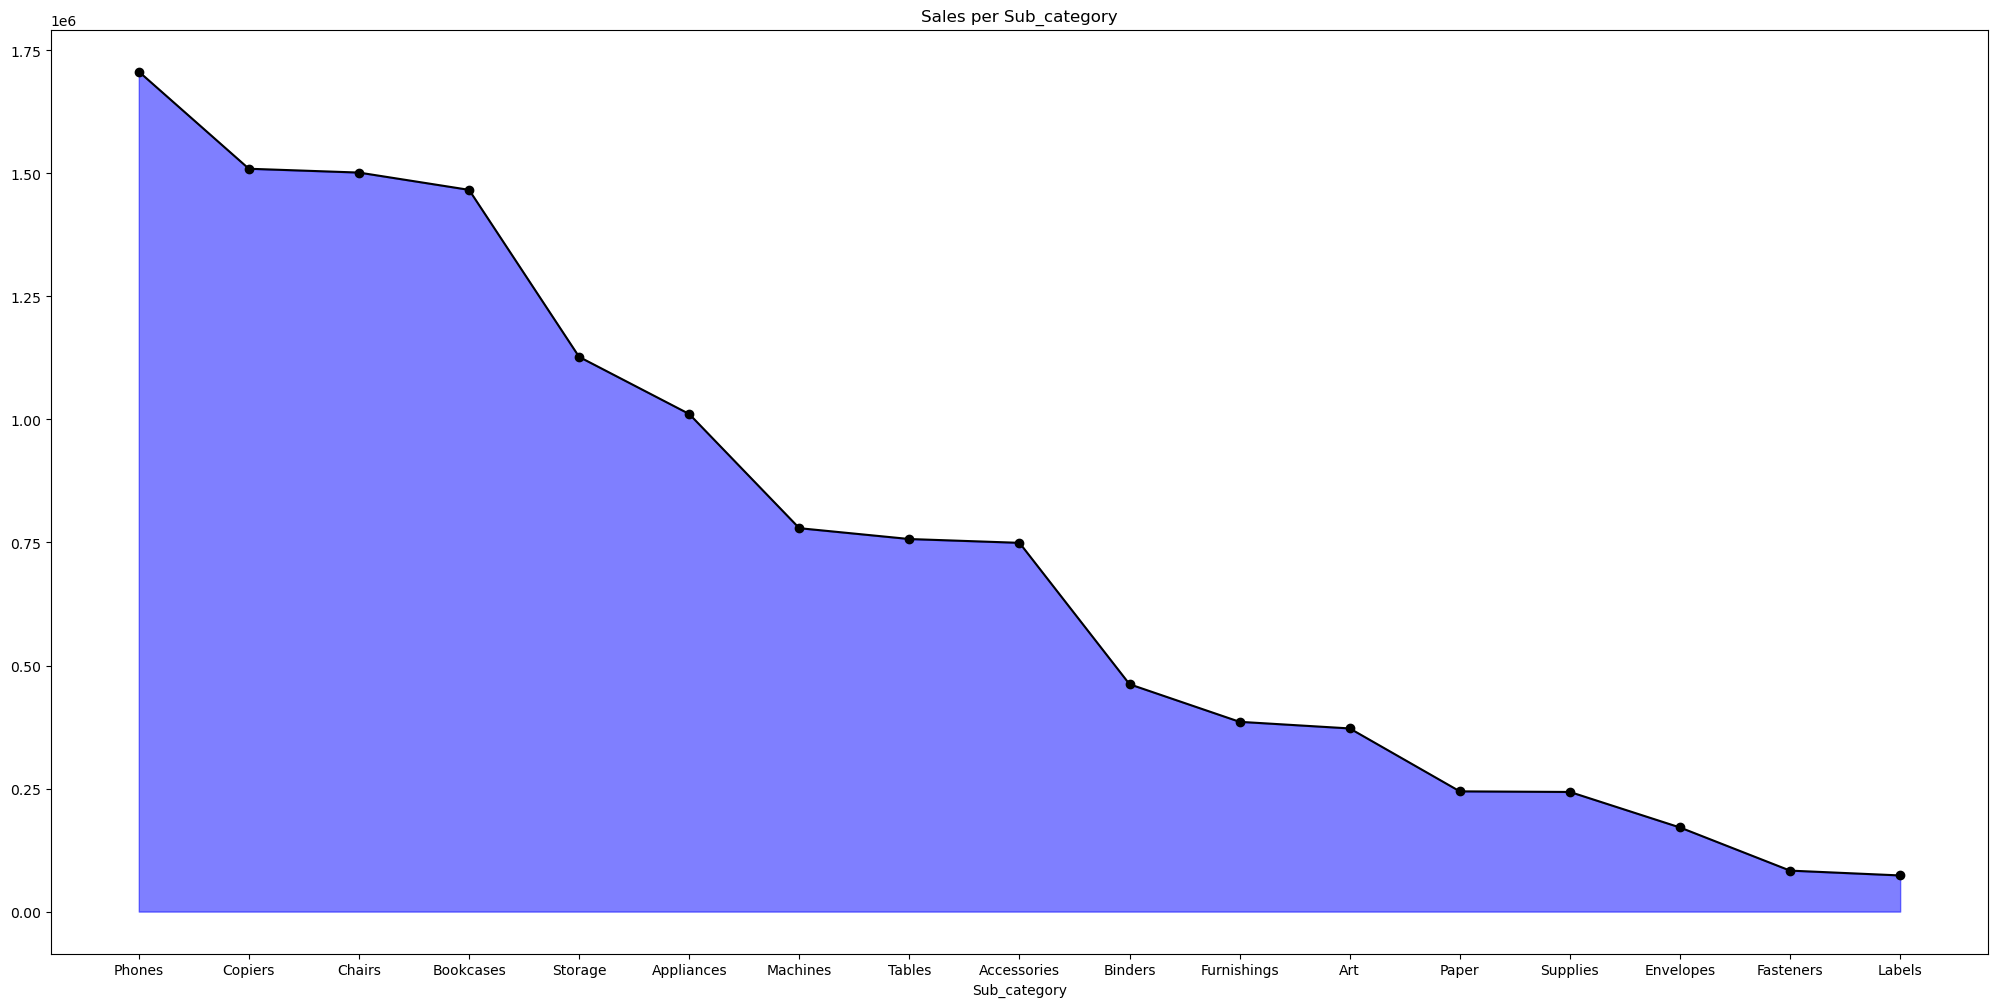

In [214]:
plt.figure(figsize=(25,12))
plt.fill_between(s_catgy.sub_category,s_catgy.sales, alpha=0.5,color='blue')

plt.plot(s_catgy.sub_category,s_catgy.sales,marker='o', color='black')
plt.title('Sales per Sub_category')
plt.xlabel('Sub_category')


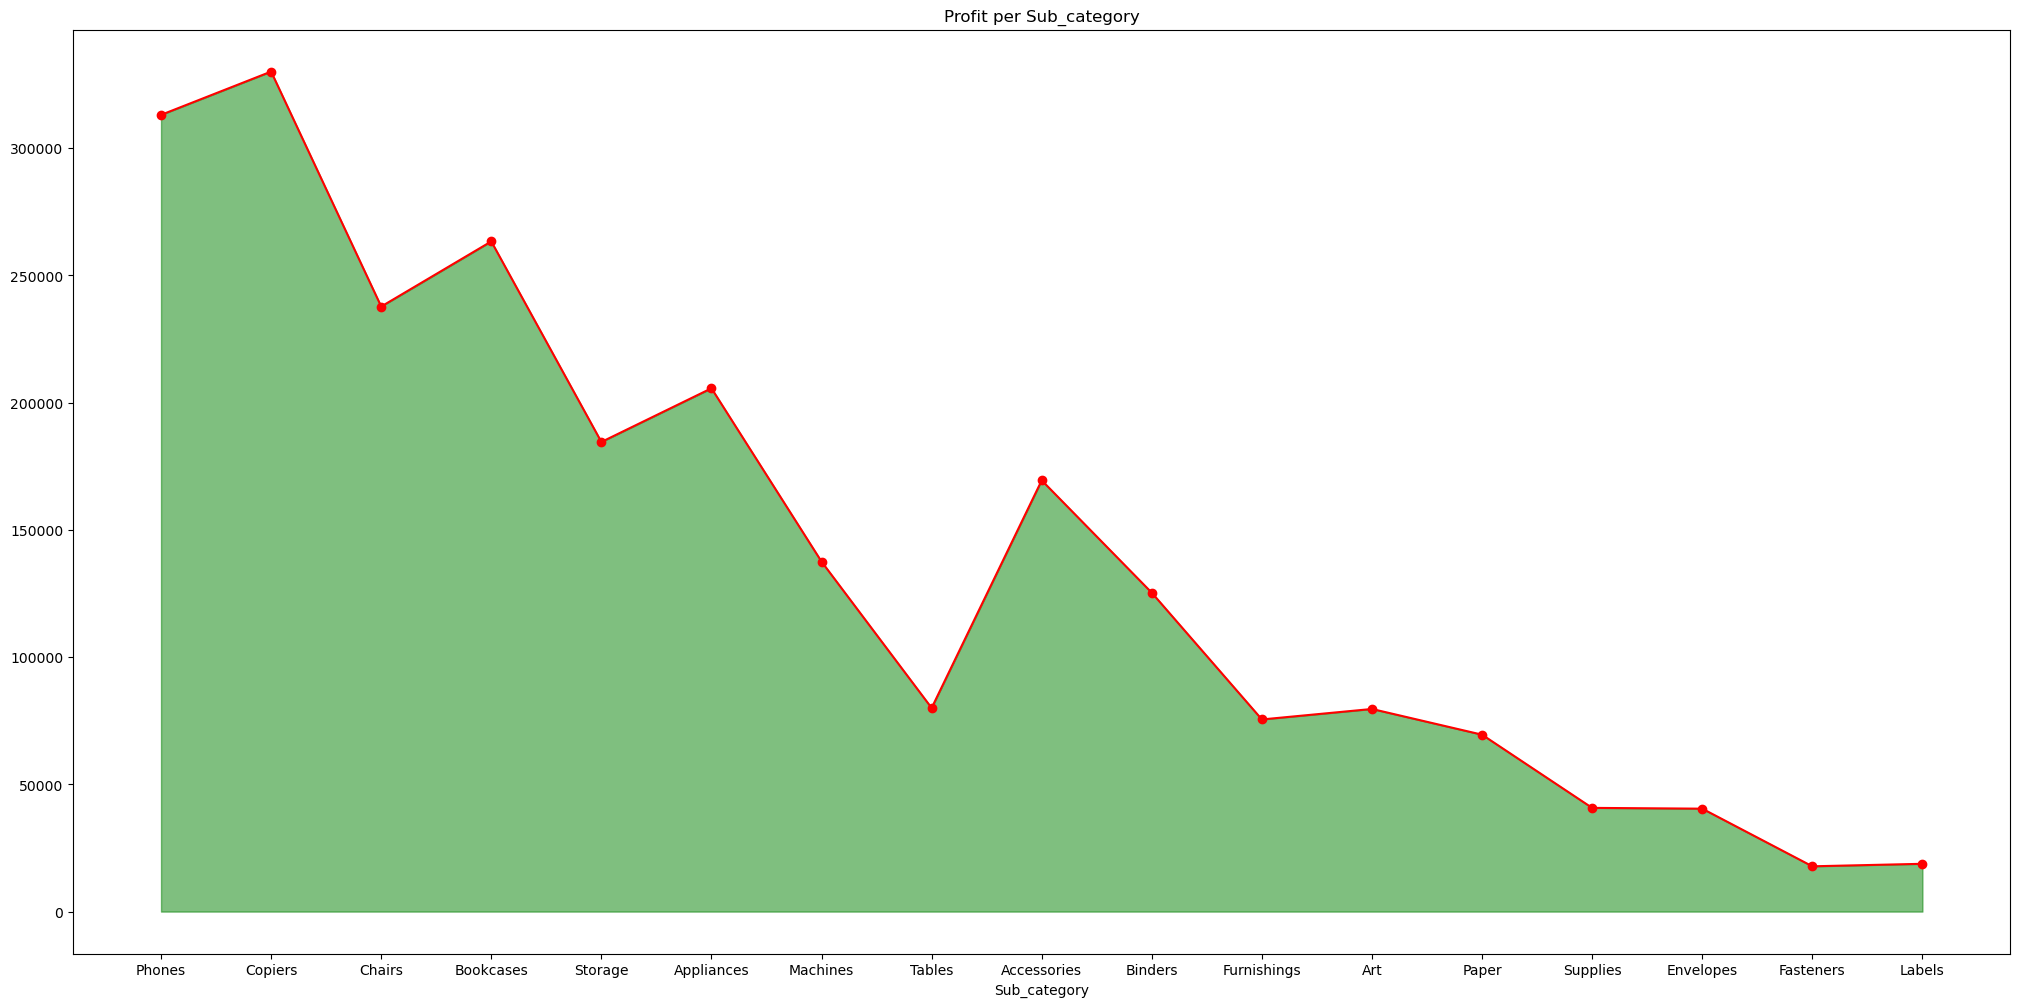

In [215]:
plt.figure(figsize=(25,12))
plt.fill_between(s_catgy.sub_category,s_catgy.profit, alpha=0.5,color='green')

plt.plot(s_catgy.sub_category, s_catgy.profit, marker='o', color='r')
plt.title('Profit per Sub_category')
plt.xlabel('Sub_category')

plt.show()

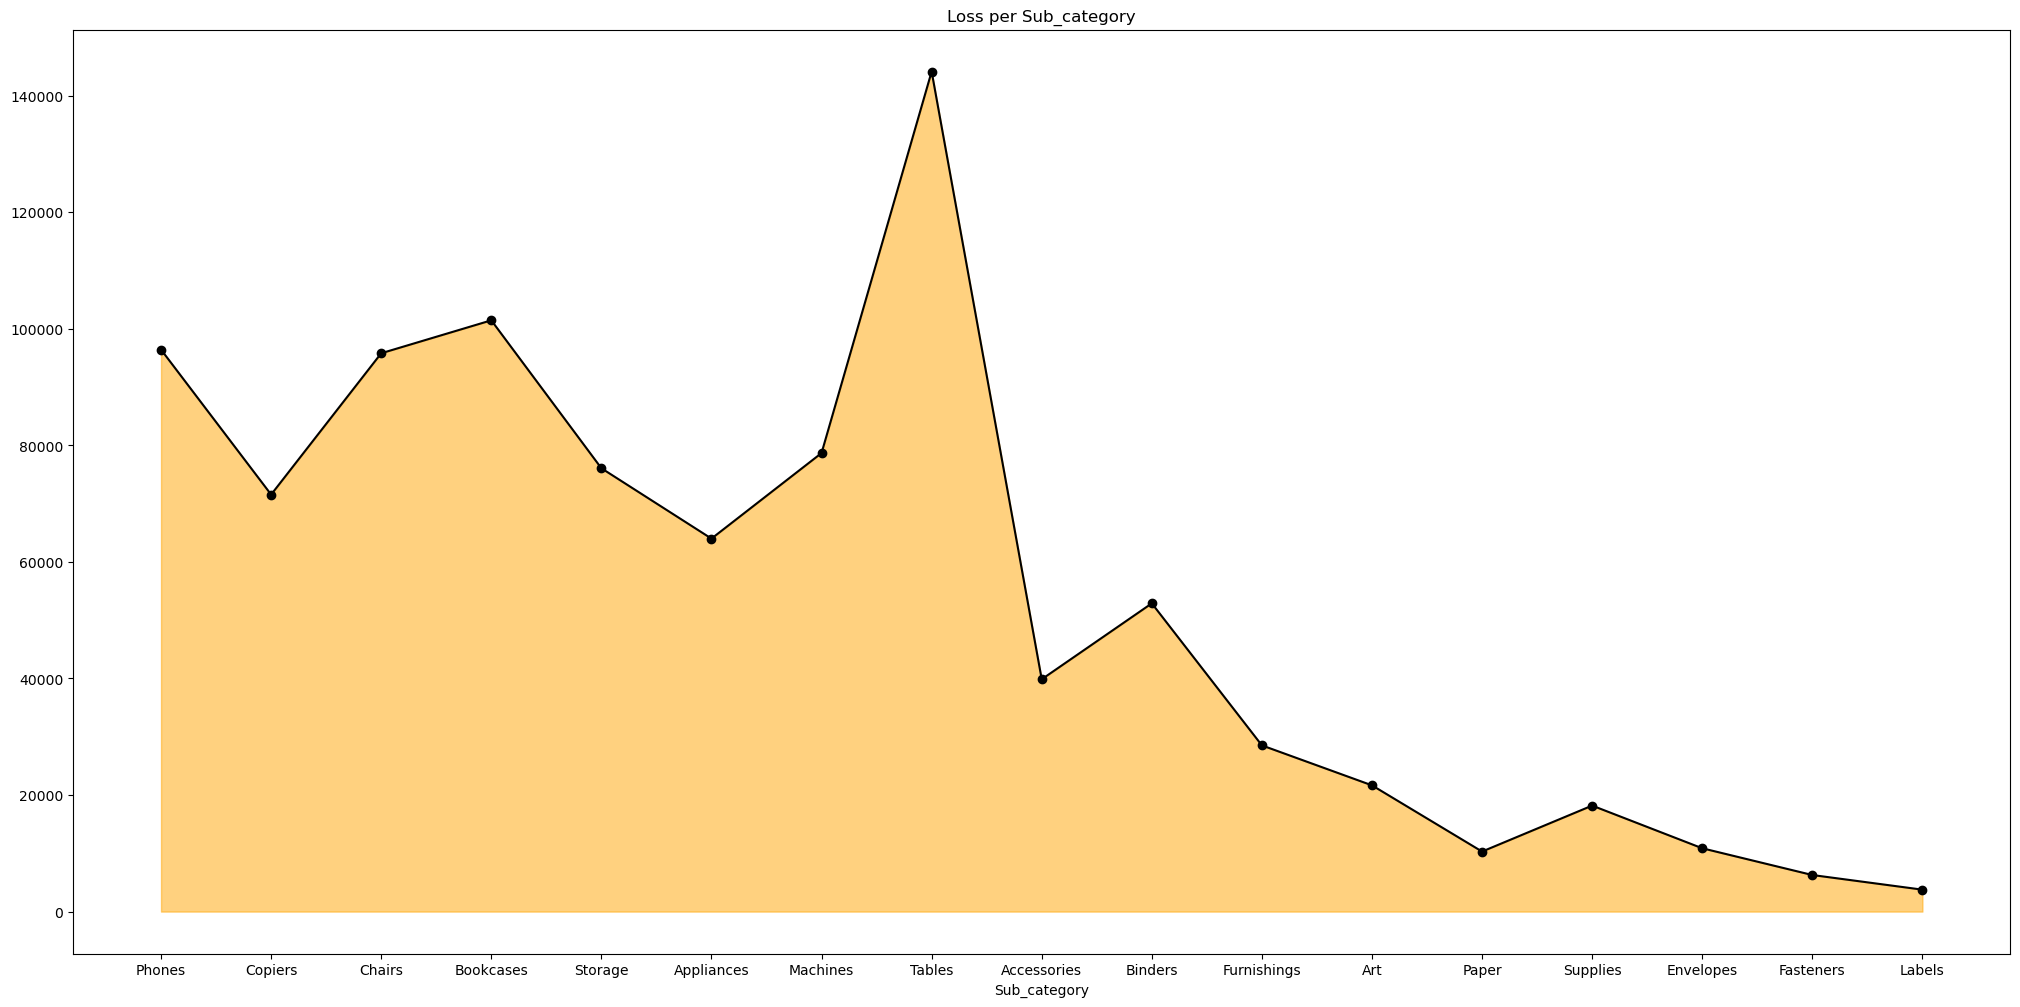

In [216]:
plt.figure(figsize=(25,12))
plt.fill_between(s_catgy.sub_category,s_catgy.loss, alpha=0.5, color='orange')

plt.plot(s_catgy.sub_category, s_catgy.loss, marker='o', color='black')
plt.title('Loss per Sub_category')
plt.xlabel('Sub_category')

plt.show()

## The highest sold product sub_category is the Phone and the least is labels

## Discount Impact on profitability

In [155]:
df.discount.dtypes

dtype('float64')

In [157]:
Finance=df[['sales','profit','loss','discount','net_sales','discounted price']]
dis_more=df[(Finance.discount)> 0.5]
dis_less=df[(Finance.discount)< 0.5]

dis_more.head(3)

,order_id,order_date,ship_date,Time to ship,ship_mode,customer_name,segment,state,country,market,...,quantity,discount,net_sales,discounted price,profit,loss,shipping_cost,order_priority,year,profit.1
11,IN-2011-65159,2011-01-03,2011-01-07,4,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,...,1,0.6,95,116.1,0,70.3995,21.32,High,2011,-70.3995
33,US-2011-136007,2011-01-04,2011-01-11,7,Standard Class,Beth Thompson,Home Office,Alagoas,Brazil,LATAM,...,6,0.6,29.6,44.4,0,107.8560,7.04,Medium,2011,-107.8560
49,CA-2011-112326,2011-01-05,2011-01-09,4,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,...,2,0.8,0.8,3.2,0,5.4870,0.55,High,2011,-5.4870


In [158]:
dis_more[['sales','profit','loss','discount','net_sales','discounted price']].head()


,sales,profit,loss,discount,net_sales,discounted price
11,211,0,70.3995,0.6,95,116.1
33,74,0,107.8560,0.6,29.6,44.4
49,4,0,5.4870,0.8,0.8,3.2
85,987,0,1011.6360,0.6,394.8,592.2
87,77,0,53.7096,0.6,30.8,46.2


In [160]:
dis_more.profit.unique() # sales with more than 0.5 discount has No profit

array([0])

In [59]:
dis_less.loss.unique()

array([0.00000e+00, 3.19464e+02, 9.56760e+01, ..., 4.42764e+01,
       1.00500e-01, 6.04800e-01])

### With this analysis we can find out that the sale with discount greater than 0.5 has an effect on profit by turning it to a loss


## Shipping Efficiency

In [162]:
ship=df[['Time to ship','order_priority']]

In [163]:
df.order_priority.unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [164]:
late_ship=ship[ship['Time to ship']>5]
late_ship
# Comparng the late shipping to order priority to know how efficient it is]

,Time to ship,order_priority
1,7,Medium
4,7,Medium
5,7,Medium
8,6,Low
13,6,Medium
...,...,...
51270,7,Medium
51273,6,Medium
51280,6,Medium
51283,7,Medium


In [166]:
late_ship[late_ship.order_priority =='High']
# High Priority goods were not shipped late

,Time to ship,order_priority


In [180]:
late_ship[late_ship.order_priority =='Critical']
# Critically needed goods where not shipped late

,Time to ship,order_priority


In [179]:
late_ship[late_ship.order_priority =='Medium']
# 6888 Fairly prioritize goods were shipped late

,Time to ship,order_priority
1,7,Medium
4,7,Medium
5,7,Medium
13,6,Medium
29,7,Medium
...,...,...
51270,7,Medium
51273,6,Medium
51280,6,Medium
51283,7,Medium


## We can conclude that the shipping efficiency, considering its order priority, is satisfactory.

In [67]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'Time to ship', 'ship_mode',
       'customer_name', 'segment', 'state', 'country', 'market', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'net_sales', 'discounted price', 'profit',
       'loss', 'shipping_cost', 'order_priority', 'year', 'profit.1'],
      dtype='object')

### Highest and least sold product

In [176]:
product=df.groupby('product_name')['sales'].sum().reset_index().sort_values('sales', ascending=False)
product

,product_name,sales
310,"Apple Smart Phone, Full Size",86936
970,"Cisco Smart Phone, Full Size",76441
2415,"Motorola Smart Phone, Full Size",73159
2501,"Nokia Smart Phone, Full Size",71904
866,Canon imageCLASS 2200 Advanced Copier,61600
...,...,...
2431,Newell 308,8
1641,Grip Seal Envelopes,7
3707,Xerox 20,6
373,Avery 5,6


## Apple Smart phone is the highest sold product and the Disposable Bag is the least sold product 

## Other Analysis

In [234]:
df['discounted price']=pd.to_numeric(df['discounted price'], errors='coerce') 

In [235]:
df['discounted price'].dtypes

dtype('float64')

In [269]:
df.net_sales=pd.to_numeric(df['net_sales'], errors='coerce')

In [276]:
aux=df.groupby('sub_category')['discounted price','sales','profit','loss','net_sales'].sum().sort_values('discounted price', ascending=False).reset_index()
aux

C:\Users\FELIX\AppData\Local\Temp\ipykernel_5184\2041512812.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aux=df.groupby('sub_category')['discounted price','sales','profit','loss','net_sales'].sum().sort_values('discounted price', ascending=False).reset_index()


,sub_category,discounted price,sales,profit,loss,net_sales
0,Chairs,184974.2,1501682,237782,95796.13190,840627.4
1,Phones,159248.7,1706874,313109,96417.66010,801558.6
2,Tables,159246.2,757034,80018,144123.14860,247665.7
3,Bookcases,149375.5,1466559,263374,101446.29730,745169.1
4,Copiers,110096.5,1509439,330119,71547.49982,737482.8
5,Storage,108025.6,1127124,184560,76063.97800,828274.5
6,Appliances,85453.5,1011081,205657,63991.69040,355848.0
7,Machines,75816.1,779071,137529,78672.74030,385250.5
8,Accessories,55899.0,749307,169472,39857.49820,524710.9
9,Binders,50793.3,461952,125296,52884.06130,316870.9


## From here we can see that Phones which is the highest selling sub_category is a row away from being the highest Discounted Product and the least sold product is also the least discounted product

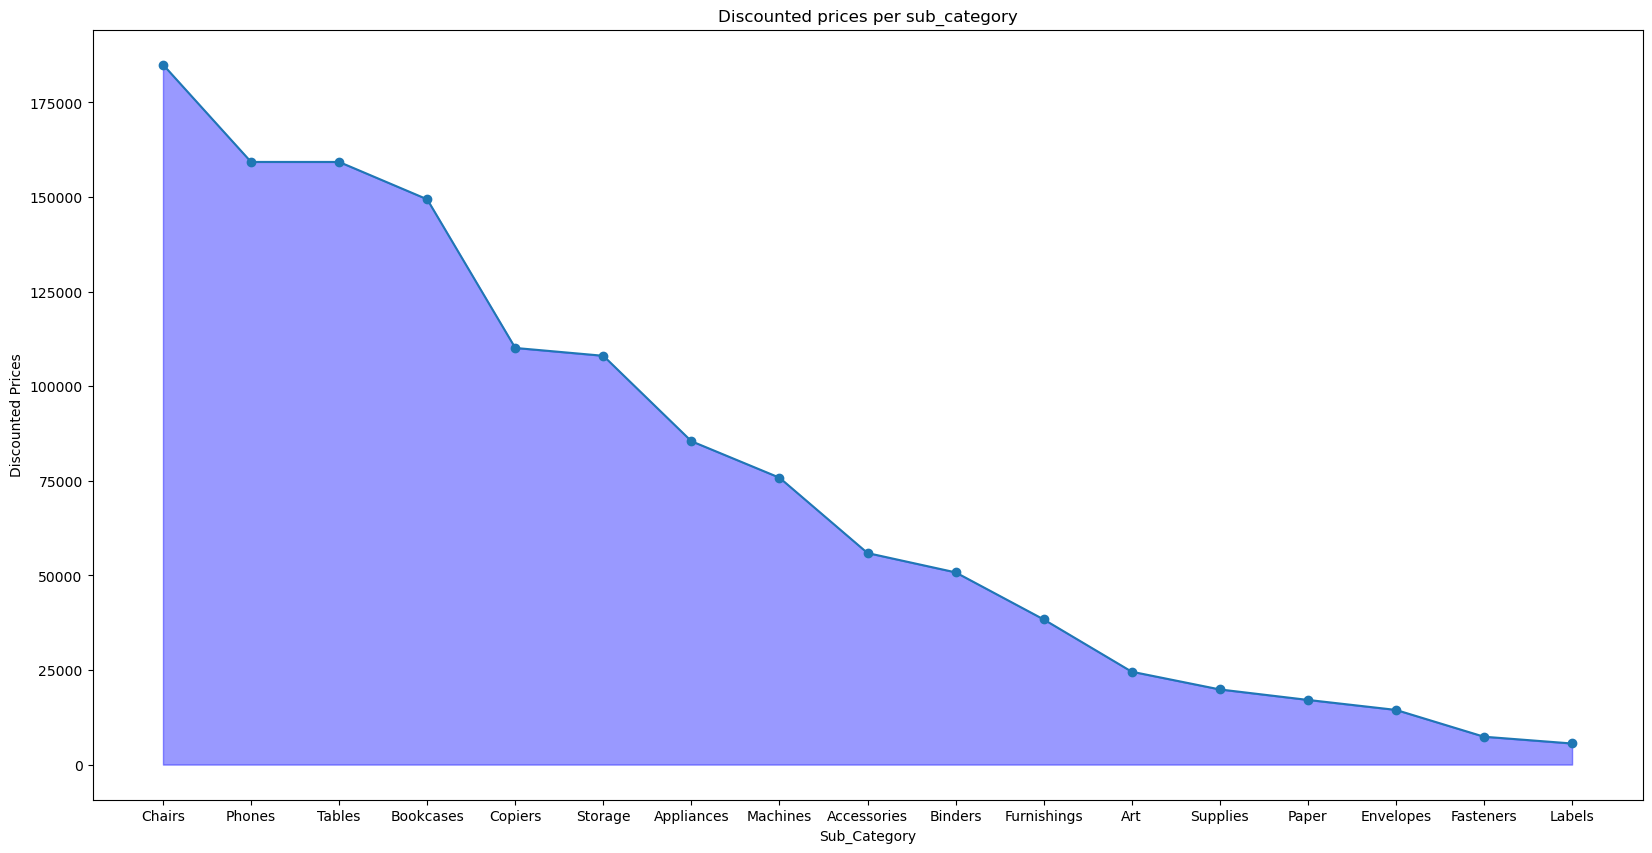

In [278]:
plt.figure(figsize=(20,10))
plt.plot(aux['sub_category'] ,aux['discounted price'], marker='o')
plt.fill_between(aux['sub_category'] ,aux['discounted price'], alpha=0.4, color='blue')
plt.title('Discounted prices per sub_category')
plt.xlabel('Sub_Category')
plt.ylabel('Discounted Prices')
plt.show()